In [38]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
# Define which Twitter accounts to pull from: 
news_organizations = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'NYTIMES']

In [40]:
# Grab the Vader Analysis scores for the most recent 100 tweets for each account:
source = []
tweet_times = []
tweet_text = []

comp_scores = []
pos_scores = []
neu_scores = []
neg_scores = []

for account in news_organizations: 
    public_tweets = api.user_timeline(account, count=100)
    for tweet in public_tweets:
        
        source.append(account)
        tweet_times.append(tweet['created_at'])
        tweet_text.append(tweet['text'])
        
        # Analyzed Data
        analyzed = analyzer.polarity_scores(tweet['text'])
        comp_scores.append(analyzed['compound'])
        pos_scores.append(analyzed['pos'])
        neu_scores.append(analyzed['neu'])
        neg_scores.append(analyzed['neg'])

In [41]:
# Add all of the data into a dataframe 
analysis_df = pd.DataFrame(data = source, columns = ["Source"])
analysis_df['Time Stamp'] = tweet_times
analysis_df['Tweet Text'] = tweet_text
analysis_df['Compound Score'] = comp_scores
analysis_df['Positive Score'] = pos_scores
analysis_df['Neutral Score'] = neu_scores
analysis_df['Negative Score'] = neg_scores
analysis_df.to_csv("tweet_sentiment_analysis.csv")
analysis_df.head()

,Source,Time Stamp,Tweet Text,Compound Score,Positive Score,Neutral Score,Negative Score
0,BBCWorld,Wed Aug 01 04:59:52 +0000 2018,Window-smashing kangaroo escapes from shelter ...,0.1280,0.176,0.824,0.000
1,BBCWorld,Wed Aug 01 03:02:23 +0000 2018,RT @SallyBundockBBC: If you are a #Facebook us...,0.0000,0.000,1.000,0.000
2,BBCWorld,Wed Aug 01 02:56:19 +0000 2018,Plastic bags: Australia anger over Coles 'cavi...,-0.7351,0.000,0.592,0.408
3,BBCWorld,Wed Aug 01 02:13:11 +0000 2018,How to print your own firearm https://t.co/Qwd...,0.0000,0.000,1.000,0.000
4,BBCWorld,Wed Aug 01 01:53:35 +0000 2018,US release of 3D-printed gun software blocked ...,-0.5423,0.000,0.571,0.429


In [42]:
# Separate the scores into individual lists by organization 
bbc_tweet_scores = comp_scores[0:100]
cbs_tweet_scores = comp_scores[100:200]
cnn_tweet_scores = comp_scores[200:300]
fox_tweet_scores = comp_scores[300:400]
nytimes_tweet_scores = comp_scores[400:500]

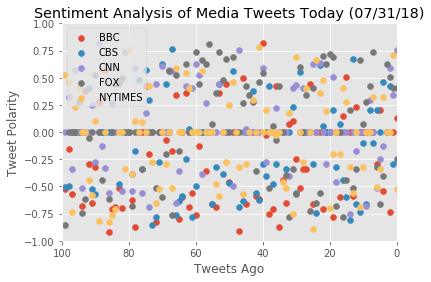

In [43]:
# Graph the Compound Sentiment Scores in a Scatter Plot
x_values = np.arange(0,len(bbc_tweet_scores), 1)
plt.scatter(x_values, bbc_tweet_scores, label = "BBC")
plt.scatter(x_values, cbs_tweet_scores, label = "CBS")
plt.scatter(x_values, cnn_tweet_scores, label = "CNN")
plt.scatter(x_values, fox_tweet_scores, label = "FOX")
plt.scatter(x_values, nytimes_tweet_scores, label = "NYTIMES")

# fig = plt.figure()
#ax = fig.add_subplot(221) #small subplot to show how the legend has moved 

#leg = plt.legend( loc = 'upper right')

# Get the bounding box of the original legend
#bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend
#xOffset = 1.5
#bb.x0 += xOffset
#bb.x1 += xOffset
#leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.legend()
plt.title("Sentiment Analysis of Media Tweets Today (07/31/18)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(100, 0)
plt.ylim(-1,1)

# Save to png then plot
plt.savefig("sentiment_analysis_over_time.png")
plt.show()
plt.close()

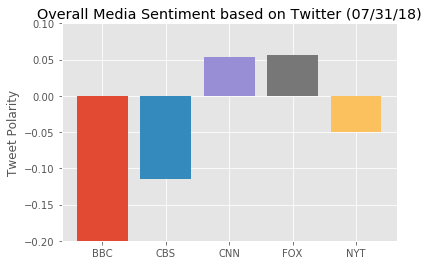

In [44]:
# Graph Average of Compound Sentiment Scores in a Bar Chart
names = ["BBC", "CBS", "CNN", "FOX", "NYT"]
x_pos = np.arange(len(names))
plt.bar(0, np.mean(bbc_tweet_scores))
plt.bar(1, np.mean(cbs_tweet_scores))
plt.bar(2, np.mean(cnn_tweet_scores))
plt.bar(3, np.mean(fox_tweet_scores))
plt.bar(4, np.mean(nytimes_tweet_scores))
plt.xticks(x_pos, names)

# plt.legend()
plt.title("Overall Media Sentiment based on Twitter (07/31/18)")
plt.ylabel("Tweet Polarity")
plt.ylim(-.2, .1)

# Save to png then plot
plt.savefig("tweet_polarity_by_organization.png")
plt.show()
plt.close()